# Partial Domination

In [3]:
# imports

from sage.graphs.graph import Graph # display graphs

from itertools import permutations # get permutations
from itertools import combinations # get power set

from sage.graphs.trees import TreeIterator # create trees iteratively

import math # for factorial function

import pandas as pd # data analysis

In [4]:
# fraction of graph we expect to dominate

partial_domination_fraction = 1/3
partial_domination_fraction2 = 2/3

## Helper Functions

In [5]:
def calculate_dominated_vertices(tree, S):
    '''
    helper function to calculate the set of dominated vertices for a tree 
     -> minimize repeated logic in other functions
    INPUTS: Sage tree (Graph) and set of vertices being checked (list)
    RETURNS: set of dominated vertices
    '''

    dominated = set() # empty set to track dominated vertices
    
    for v in S: # for a vertex in the set S
        dominated.update(tree.neighbors(v))  # add neighbors of v
        dominated.add(v)  # add the vertex itself
    
    return dominated # return the set of dominated vertices

In [6]:
def visualize_partial_domination(tree, S):
    '''
    function to visualize tree with highlighted vertices accoridng to domination 
     -> green for dominated, red for undominated
    INPUTS: Sage tree (Graph) and set of vertices in dominating set (found through check_partial_domination)
    '''
    
    #tree.show(layout='tree') # uncomment to see the original tree uncolored

    dominated = calculate_dominated_vertices(tree, S)  # use helper function

    # group vertices by color
    green_vertices = list(dominated)
    red_vertices = [v for v in tree.vertices() if v not in dominated]

    # create vertex_colors dictionary for Sage
    vertex_colors = {'green': green_vertices, 'red': red_vertices}

    # visualize the graph
    tree.show(vertex_colors=vertex_colors)
        #note: we can add "layout='tree'" as a tree.show() parameter to force a tree layout


## Incrementally Increasing Subset Sizes

Check for the smallest size set of partial domination by checking 1, 2, ... n size sets for partial domination. Return when 1/3 dominaton is reached for each set.

This should be computationally more efficient than checking permutations. Thus, we check a worst case size 2^n. 

In [7]:
def subset_partial_domination(tree, fraction=partial_domination_fraction):
    """
    function to test vertex sets of various sizes to find fraction dominated set 
     -> we are using 1/3 as decleared above
     -> we incrementally increase the subset size
    INPUTS: Sage tree (Graph) and fraction of graph to be dominated (float)
    RETURNS: list of smallest valid 1/3 dominating set 
    """
    vertices = tree.vertices()
    required_dominated = int(fraction * len(vertices))  # minimum number of vertices to dominate

    size_counts = {}  # dictionary to track set sizes
    smallest_set = None  # track the smallest valid set
    min_size = float('inf')  # start with an infinitely large size
    valid_sets = []  # track valid sets of the smallest size


    total_subsets = sum(math.comb(len(vertices), i) for i in range(1, len(vertices) + 1))
    # print("Total subsets: ", total_subsets) # UNCOMMENT to print

    # iterate over subsets starting from size 1 up to vertex length
    for i in range(1, len(vertices) + 1):
        for subset in combinations(vertices, i): # using combinations from itertools
            dominated = calculate_dominated_vertices(tree, subset)  # use helper function
            
            # if this subset dominates at least 1/3 of the vertices, track it
            if len(dominated) >= required_dominated:
                set_size = len(subset) # get dominating set size

                ''' UNCOMENT TO TRACK ALL SUBSET SIZES:
                # update size count
                if set_size in size_counts: # if size exists already, add 1
                    size_counts[set_size]+= 1
                else:
                    size_counts[set_size]=1
                

                # update smallest set tracker if this one is smaller
                if set_size < min_size:
                    min_size = set_size
                    smallest_set = list(subset) # store smallest set found
                '''

                # find the total number of smallest sets
                if set_size < min_size:
                    min_size = set_size
                    valid_sets = [subset] # start again if a smaller set is found
                elif set_size == min_size:
                    valid_sets.append(subset) # add more of same size
                    
    ''' UNCOMENT TO TRACK ALL SUBSET SIZES:
    # print set size distribution
    print("\nSet Size Distribution of Valid Partial Domination Sets:")
    for size in sorted(size_counts.keys()):
        print(f"Size {size}: {size_counts[size]} occurrences") 
    '''

    ''' UNCOMMENT TO PRINT: 
    print(f"Smallest set size: {min_size}")
    print(f"Occurances: {len(valid_sets)}")
    print(f"\nExample set: {valid_sets[0] if valid_sets else None} \n")
    '''
            
    # return valid_sets[0] if valid_sets else None # return example of smallest set
    return (valid_sets[0], len(valid_sets)) if valid_sets else (None, 0) # return udates to also show # occurances

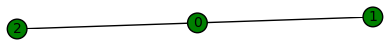

In [8]:
# TEST 1 - check functions to find a 1/3-dominating set using permutations
tree = next(TreeIterator(3))

dominating_set, _ = subset_partial_domination(tree)

# visualize tree 
visualize_partial_domination(tree, dominating_set)


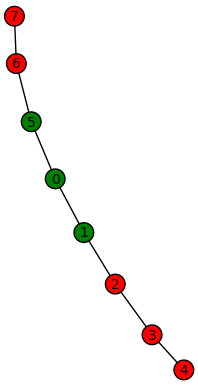

In [9]:
# TEST 2

# generate a tree with 5 vertices
tree = next(TreeIterator(8))

# find a 1/3-dominating set
dominating_set, _ = subset_partial_domination(tree, fraction=1/3)

# visualize tree
visualize_partial_domination(tree, dominating_set)

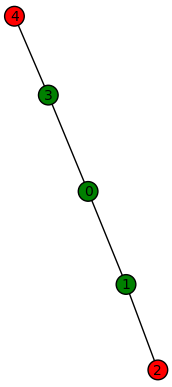

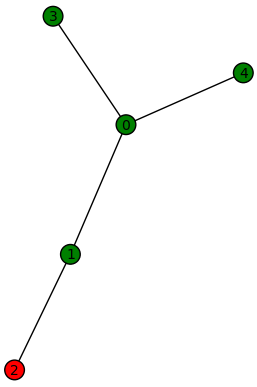

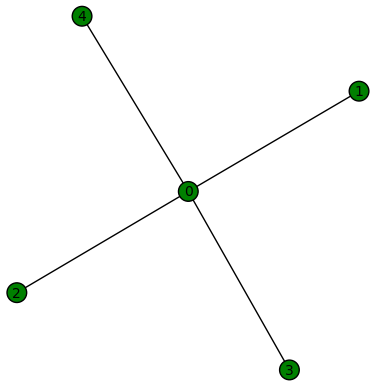

In [10]:
for i, T in enumerate(TreeIterator(5)):
    # print(f"TREE {i + 1}")
    #T.show() # uncomment to see orginal tree
    
    # find the 1/3-dominating set
    dominating_set, _ = subset_partial_domination(T)

    visualize_partial_domination(T, dominating_set)

In [11]:
for i, T in enumerate(TreeIterator(10)):
    # print(f"TREE {i + 1}")
    #T.show() # uncomment to see orginal tree
    
    # find the 1/3-dominating set
    dominating_set = subset_partial_domination(T)
    
    #visualize_partial_domination(T, dominating_set)

## DataFrame
Consider using SQLite instead of Excel for data storage?

In [12]:
def excel_saved__partial_domination(max_vertices, fraction1=partial_domination_fraction, fraction2=partial_domination_fraction2, save_to_excel=True):
    """
    function to test the partial domination function over different size trees and save to an Excel file 
    INPUTS: max_vertices # trees vertices to collect data (1 to max), partial domination fraction (1/3), and boolean save_to_excel
    RETURNS: list of smallest valid 1/3 dominating set
    
    """
    data = []  # store results here
    trees_list = []  # store list of trees for visualizing
    
    for n in range(1, max_vertices + 1):  # starting from 1 vertex
        
        for tree in TreeIterator(n):
            # append tree twice (because we have both 1/3 and 2/3 tracking, so it keeps data consistency
            trees_list.append(tree)
            trees_list.append(tree)
            
            # run for fraction 1: 1/3
            result1, occurrences1 = subset_partial_domination(tree, fraction1) # function defined above
            min_size1 = len(result1) if result1 else None
            
            '''
            print(f"Fraction: {fraction1}")
            print(f"Number of Vertices: {n}")            
            print(f"Smallest set size: {min_size1}")
            print(f"Occurrences: {occurrences1}")
            print(f"\nExample set: {result1 if result1 else None} \n")
            '''
            
            # store the relevant data
            data.append({
                "Vertices": n,
                "Partial Domination Fraction": fraction1,
                "Smallest Set Size": min_size1,
                "Occurrences": occurrences1,
                "Example Set": result1,
                "Tree": tree.edges()
            })

            # run for fraction 2: 2/3
            result2, occurrences2 = subset_partial_domination(tree, fraction2) # function defined above
            min_size2 = len(result2) if result2 else None

            '''
            print(f"Fraction: {fraction2}")
            print(f"Number of Vertices: {n}")            
            print(f"Smallest set size: {min_size2}")
            print(f"Occurrences: {occurrences2}")
            print(f"\nExample set: {result2 if result2 else None} \n")
            '''
            
            # store the relevant data
            data.append({
                "Vertices": n,
                "Partial Domination Fraction": fraction2,
                "Smallest Set Size": min_size2,
                "Occurrences": occurrences2,
                "Example Set": result2,
                "Tree": tree.edges()
            })
    
    # make a Pandas df
    df = pd.DataFrame(data)
    
    # export to Excel
    if save_to_excel:
        filename = f"partial_domination_results_{max_vertices}_vertices.xlsx"
        df.to_excel(filename, index=False)
        print(f"\nData saved to {filename}")

    return df, trees_list # return df to return the dataframe

In [ ]:
# analyze trees up to 14 vertices
df, trees_list = excel_saved__partial_domination(max_vertices=14)

In [ ]:
df

In [ ]:
def visualize_tree_from_excel(df, trees_list, row_index):
    '''
    function to visualize a specific tree with highlighted vertices accoridng to domination  from the Excel-stored DataFrame
     -> green for dominated, red for undominated
    INPUTS: df (created from excel), trees list created in excel function, row index from corresonding Excel row
    -> note that DF and lists are 0-indexed, so if we are looking for an Excel row, make sure that you subtract 1 from the row for row_index
    '''
    
    # retrieve tree object from the list using the row index
    tree = trees_list[row_index]
    
    # retrieve example dominating set from the DF
    S = df.iloc[row_index]["Example Set"]
    
    # ensure set is properly formatted
    if pd.isna(S) or S is None:
        print("No dominating set found for this tree.")
        return

    # convert from DF stored format (list-like) to actual SageMath set
    S = set(S) if isinstance(S, (list, tuple)) else {S}
    
    print(f"Visualizing tree at index {row_index} with dominating set: {S}")
    
    # call SageMath visualization function (defined above)
    visualize_partial_domination(tree, S)

In [ ]:
# Visualize from Excel test

visualize_tree_from_excel(df, trees_list, row_index=5)  # row index is 5, so this is row 6 of Excel

## Store the variables

In [ ]:
# store the DataFrame
%store df
# %store -r df

In [ ]:
# store the trees list
%store trees_list
# %store -r trees_list